# Lab 6/ Spotify data set😜😜😜😜

Minakov Nikita, csse 1707DA

@minakov.nv

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

I'll start with the data from the Spotify database and I'll consider on Jazz and Pop music.

In [2]:
#df = brfss.ReadBrfss(nrows=None)

db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')

Pop_db = db_read[db_read['genre'] == 'Pop']
Jazz_db = db_read[db_read['genre'] == 'Jazz']

Here are the mean and standard deviation of Pop and Jazz popularity.

In [14]:
# Pop
pop_popul = Pop_db.popularity
mean1, std1 = pop_popul.mean(), pop_popul.std()
print('Pop music:',mean1, std1)

#jazz
jazz_popul = Jazz_db.popularity
mean2, std2 = jazz_popul.mean(), pop_popul.std()
print('Jazz music:',mean2, std2)

Pop music: 66.59066695077776 7.248796805896806
Jazz music: 40.82438301027434 7.248796805896806


`NormalPdf` returns a Pdf object that represents the normal distribution with the given parameters.

`Density` returns a probability density, which doesn't mean much by itself.

In [16]:
pdf1 = thinkstats2.NormalPdf(mean1, std1)
print(pdf1.Density(mean1 + std1))

pdf2 = thinkstats2.NormalPdf(mean2, std2)
print(pdf2.Density(mean2 + std2))

0.033380812153860254
0.033380812153860226


`thinkplot` provides `Pdf`, which plots the probability density with a smooth curve.

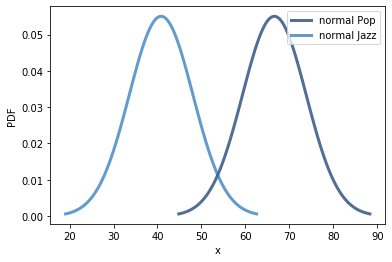

In [19]:
# pop
thinkplot.Pdf(pdf1, label='normal Pop')
thinkplot.Config(xlabel='x', ylabel='PDF')
# jazz
thinkplot.Pdf(pdf2, label='normal Jazz')
thinkplot.Config(xlabel='x', ylabel='PDF')

Normal pop and jazz density pdf hists

`Pdf` provides `MakePmf`, which returns a `Pmf` object that approximates the `Pdf`. 

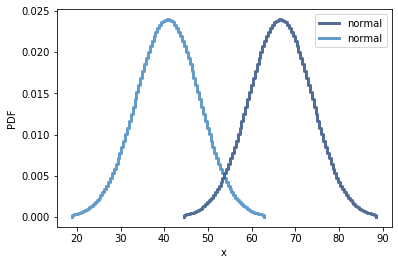

In [21]:
pmf1 = pdf1.MakePmf()
thinkplot.Pmf(pmf1, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

pmf2 = pdf2.MakePmf()
thinkplot.Pmf(pmf2, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

Normal pop and jazz density pmf hists

Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE).

If you run this a few times, you'll see how much variation there is in the estimate.

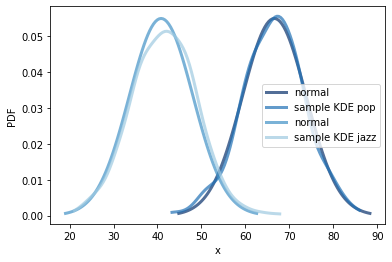

In [29]:
# pop
thinkplot.Pdf(pdf1, label='normal')

sample1 = np.random.normal(mean1, std1, 500)
sample_pdf1 = thinkstats2.EstimatedPdf(sample1, label='sample pop')
thinkplot.Pdf(sample_pdf1, label='sample KDE pop')
thinkplot.Config(xlabel='x', ylabel='PDF')

# Jazz
thinkplot.Pdf(pdf2, label='normal')

sample2 = np.random.normal(mean2, std2, 500)
sample_pdf2 = thinkstats2.EstimatedPdf(sample2, label='sample jazz')
thinkplot.Pdf(sample_pdf2, label='sample KDE jazz')
thinkplot.Config(xlabel='x', ylabel='PDF')

Looking at the graphs for the normal and the sample, we see no big difference between the curves.

## Moments

Raw moments are just sums of powers.

In [30]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

The first raw moment is the mean.  The other raw moments don't mean much.

In [31]:
RawMoment(pop_popul, 1), RawMoment(pop_popul, 2), RawMoment(pop_popul, 3)

(66.59066695077776, 4486.856381845301, 305866.58725761774)

In [32]:
RawMoment(jazz_popul, 1), RawMoment(jazz_popul, 2), RawMoment(jazz_popul, 3)

(40.82438301027434, 1758.5663594958162, 78657.27687744942)

In [33]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(pop_popul)

66.59066695077776

In [34]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(jazz_popul)

40.82438301027434

The central moments are powers of distances from the mean.

In [35]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

The first central moment is approximately 0.  The second central moment is the variance.

In [37]:
CentralMoment(pop_popul, 1), CentralMoment(pop_popul, 2), CentralMoment(pop_popul, 3)

(-6.116345207611654e-13, 52.53945689589727, 86.55332632672273)

In [38]:
CentralMoment(jazz_popul, 1), CentralMoment(jazz_popul, 2), CentralMoment(jazz_popul, 3)

(7.563295045509457e-13, 91.93611132624046, -641.5797741068816)

In [41]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(pop_popul)

52.53945689589727

In [40]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(jazz_popul)

91.93611132624046

The standardized moments are ratios of central moments, with powers chosen to make the dimensions cancel.

In [42]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

The third standardized moment is skewness.

In [43]:
StandardizedMoment(pop_popul, 1), StandardizedMoment(pop_popul, 2), StandardizedMoment(pop_popul, 3)

(-8.438188047225185e-14, 1.0, 0.22727695080681123)

In [44]:
StandardizedMoment(jazz_popul, 1), StandardizedMoment(jazz_popul, 2), StandardizedMoment(jazz_popul, 3)

(7.888019535890258e-14, 0.9999999999999999, -0.7278157826249918)

In [45]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(pop_popul)

0.22727695080681123

In [46]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(jazz_popul)

-0.7278157826249918

Normally a negative skewness indicates that the distribution has a longer tail on the left.  In that case, the mean is usually less than the median.

In [47]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

But in this case the mean is greater than the median, which indicates skew to the right.

In [48]:
Mean(pop_popul), Median(pop_popul)

(66.59066695077776, 66)

In [49]:
Mean(jazz_popul), Median(jazz_popul)

(40.82438301027434, 40)

Because the skewness is based on the third moment, it is not robust; that is, it depends strongly on a few outliers.  Pearson's median skewness is more robust.

In [50]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

Pearson's skewness is positive, indicating that the distribution of population is slightly skewed to the right.

In [53]:
PearsonMedianSkewness(pop_popul)

0.24446750312954024

In [54]:
PearsonMedianSkewness(jazz_popul)

0.2579331859052968